our question - 
Do people at risk of heart disease have high blood pressure?


Blood pressure is measured on diastolic and systolic blood pressure. In this part of the project, we chose to measure blood pressure according to systolic blood pressure - sysBP

question 1, a:

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f, norm, t, chi2
from scipy import stats

df = pd.read_csv("framingham_heart_disease.csv") 
df = df.loc[df["sysBP"]!=None]
print(df[["age","education","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]].mean())


age            49.584946
education       1.978950
cigsPerDay      9.003089
totChol       236.721585
sysBP         132.352407
diaBP          82.893464
BMI            25.802008
heartRate      75.878924
glucose        81.966753
dtype: float64


question 1, b:

In [104]:
TenYearCHD_0 = df.loc[df["TenYearCHD"]==0]["sysBP"]
TenYearCHD_0_mean = TenYearCHD_0.mean()

TenYearCHD_1 = df.loc[df["TenYearCHD"]==1]["sysBP"]
TenYearCHD_1_mean = TenYearCHD_1.mean()

print(TenYearCHD_0_mean)
print(TenYearCHD_1_mean)
n_0 = len(TenYearCHD_0)
n_1 = len(TenYearCHD_1)
var_0 = TenYearCHD_0.var()
var_1 = TenYearCHD_1.var()
mean_se_0 = (var_0/n_0)**0.5
mean_se_1 = (var_1/n_1)**0.5

print("Confidence interval of mean -[", TenYearCHD_0_mean - 1.96*mean_se_0,",",TenYearCHD_0_mean + 1.96*mean_se_0,"]" )
print("Confidence interval of mean -[", TenYearCHD_1_mean - 1.96*mean_se_1,",",TenYearCHD_1_mean + 1.96*mean_se_1,"]" )

130.33361157484697
143.6187888198758
Confidence interval of mean -[ 129.6648498051681 , 131.00237334452584 ]
Confidence interval of mean -[ 141.5573696738623 , 145.68020796588928 ]


question 1, b : According to the central limit theorem, the sample mean is normally distributed with a mean and variance as we received in the question data

question 1
c: No, the confidence intervals do not overlap. The meaning of an overlap between the confidence intervals is that there will be similarity between the data, which will make it difficult for us to differentiate between the categories and because of this we will get a high level of clarity(alpha).

question 2, a:

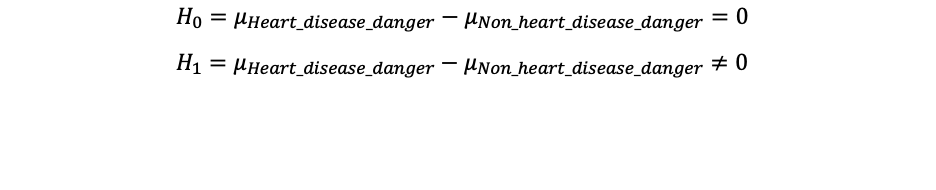

question 2, b:

Text(0.5, 1.0, 'histogram of sysBP acroos non TenYearCHD people (in danger for heart disease in the last ten years)')

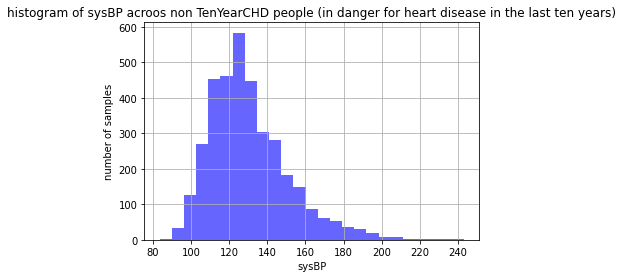

In [105]:
TenYearCHD_0.hist(bins=25, alpha=0.6, color='b')
plt.ylabel("number of samples")
plt.xlabel("sysBP")
plt.title("histogram of sysBP acroos non TenYearCHD people (in danger for heart disease in the last ten years)")


Text(0.5, 1.0, 'histogram of sysBP acroos TenYearCHD people (in danger for heart disease in the last ten years)')

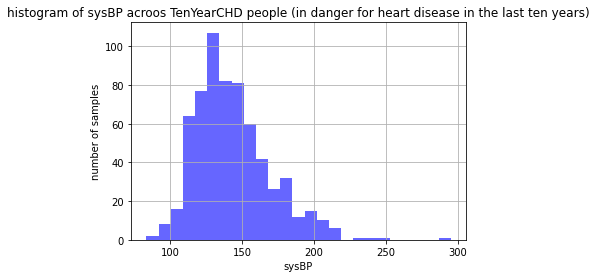

In [106]:

TenYearCHD_1.hist(bins=25, alpha=0.6, color='b')
plt.ylabel("number of samples")
plt.xlabel("sysBP")
plt.title("histogram of sysBP acroos TenYearCHD people (in danger for heart disease in the last ten years)")


In [107]:
Sx_0 = sum((TenYearCHD_0 - TenYearCHD_0_mean)**2)/(n_0-1)
Sx_1 = sum((TenYearCHD_1 - TenYearCHD_1_mean)**2)/(n_1-1)

TS_F = Sx_0/Sx_1

F = f.cdf(0.95, n_0-1, n_1-1)

if TS_F > F:
  print("Variances are diffrent")
else:
  print("Variances are equal")

Variances are diffrent


qustion 2,b: From the histogram it can be seen that the assumption of normality holds and the samples are i.i.d,
From the F test it follows that the variances are different

question 2, c:

In [108]:
s_p = (((n_0-1)*var_0+(n_1-1)*var_1)/(n_0+n_1-2))**0.5
statistic_t = (TenYearCHD_1_mean-TenYearCHD_0_mean)/(s_p*((1/n_1)+(1/n_0))**0.5)
t_a = stats.t.cdf(1-(0.05/2), n_0+n_1-2)

if statistic_t > t_a or statistic_t < -t_a:
  print("means are diffrent")
else:
  print("means are equal")

means are diffrent


question 2, d:

In [109]:
val = (TenYearCHD_1_mean-TenYearCHD_0_mean)/((var_1/n_1)+(var_0/n_0))**0.5
statistic_z = stats.norm.cdf(0.05/2)

if val > statistic_z or val < -statistic_z:
  print("means are diffrent")
else:
  print("means are equal")

means are diffrent


question 2, e:

In [110]:
p_value_t = stats.t.cdf(statistic_t, n_0+n_1-2)
print(p_value_t)

val = (TenYearCHD_1_mean-TenYearCHD_0_mean)/((var_1/n_1)+(var_0/n_0))**0.5
p_value_z = stats.norm.cdf(val)
print(p_value_z)

1.0
1.0


question 2, f:

In [111]:
#%%
import math

s_p = (((n_0-1)*var_0+(n_1-1)*var_1)/(n_0+n_1-2))**0.5
TenYearCHD = df.loc[df["TenYearCHD"]]["sysBP"]
var_all = TenYearCHD_0.var()
n = n_0 + n_1
lambda1 = 2*np.log(((1/(((2*math.pi*(s_p)**2)**1/n)))*np.exp((-sum((TenYearCHD_0 - TenYearCHD_0_mean)**2)/(2*s_p**2))+(-sum((TenYearCHD_1 - TenYearCHD_1_mean)**2)/(2*s_p**2)))) / (((1/((2*math.pi*(var_all)**2)))**1/n)*np.exp(-sum((TenYearCHD)**2)/(2*var_all**2))))
chi = chi2.cdf(0.95,2)
if chi > lambda1:
  print("means are diffrent")
else:
  print("means are equal")

means are diffrent


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


question 3, a+b:

In [112]:
TenYearCHD_syBP = df[["sysBP", "TenYearCHD"]]
smaple_lengths = [30, 50, 100, 500]
for length in smaple_lengths:
  sample = TenYearCHD_syBP.sample(n=length)
  sample_TenYearCHD_0 = sample.loc[df["TenYearCHD"]==0]["sysBP"]
  sample_TenYearCHD_0_mean = sample_TenYearCHD_0.mean()

  sample_TenYearCHD_1 = sample.loc[df["TenYearCHD"]==1]["sysBP"]
  sample_TenYearCHD_1_mean = sample_TenYearCHD_1.mean()
  
  sample_n_0 = len(sample_TenYearCHD_0)
  sample_n_1 = len(sample_TenYearCHD_1)

  while sample_n_1 == 0 or sample_n_0 ==0:
    sample = TenYearCHD_syBP.sample(n=length)
    sample_TenYearCHD_1 = sample.loc[df["TenYearCHD"]==1]["sysBP"]
    sample_TenYearCHD_1_mean = sample_TenYearCHD_1.mean()
    sample_n_1 = len(sample_TenYearCHD_1)

    sample_TenYearCHD_0 = sample.loc[df["TenYearCHD"]==0]["sysBP"]
    sample_TenYearCHD_0_mean = sample_TenYearCHD_0.mean()
    sample_n_0 = len(sample_TenYearCHD_0)

  sample_var_0 = sample_TenYearCHD_0.var()
  sample_var_1 = sample_TenYearCHD_1.var()
  sample_mean_se_0 = (sample_var_0/sample_n_0)**0.5
  sample_mean_se_1 = (sample_var_1/sample_n_1)**0.5

  print("Confidence interval of 0 category sample mean with length ",length," -[", sample_TenYearCHD_0_mean - 1.96*sample_mean_se_0,",",sample_TenYearCHD_0_mean + 1.96*sample_mean_se_0,"]" )
  print("Confidence interval of 1 category sample mean with length ",length," -[", sample_TenYearCHD_1_mean - 1.96*sample_mean_se_1,",",sample_TenYearCHD_1_mean + 1.96*sample_mean_se_1,"]" )
  print()

Confidence interval of 0 category sample mean with length  30  -[ 119.92867138371889 , 137.34055938551188 ]
Confidence interval of 1 category sample mean with length  30  -[ 129.34150999881524 , 202.40849000118476 ]

Confidence interval of 0 category sample mean with length  50  -[ 125.29581382033085 , 137.61529729078023 ]
Confidence interval of 1 category sample mean with length  50  -[ 117.90598576376179 , 149.09401423623822 ]

Confidence interval of 0 category sample mean with length  100  -[ 125.84219881474186 , 134.3282557307127 ]
Confidence interval of 1 category sample mean with length  100  -[ 150.39831387724408 , 172.2683527894226 ]

Confidence interval of 0 category sample mean with length  500  -[ 128.4337842434992 , 132.40469556647707 ]
Confidence interval of 1 category sample mean with length  500  -[ 144.6230964129417 , 158.16171371364058 ]



question 3, b: 
we can see that as much as we are increasing sample size, the Confidence interval for the mean is more similar to the full data samples

In [113]:
TenYearCHD_syBP = df[["sysBP", "TenYearCHD"]]
smaple_lengths = [30, 50, 100, 500]
for length in smaple_lengths:
  sample = TenYearCHD_syBP.sample(n=length)
  sample_TenYearCHD_0 = sample.loc[df["TenYearCHD"]==0]["sysBP"]
  sample_TenYearCHD_0_mean = sample_TenYearCHD_0.mean()

  sample_TenYearCHD_1 = sample.loc[df["TenYearCHD"]==1]["sysBP"]
  sample_TenYearCHD_1_mean = sample_TenYearCHD_1.mean()

  sample_n_0 = len(sample_TenYearCHD_0)
  sample_n_1 = len(sample_TenYearCHD_1)
  sample_var_0 = sample_TenYearCHD_0.var()
  sample_var_1 = sample_TenYearCHD_1.var()
  sample_var_0 = (sample_var_0/sample_n_0)
  sample_var_1 = (sample_var_1/sample_n_1)

  val = (sample_TenYearCHD_1_mean-sample_TenYearCHD_0_mean)/((sample_var_1/sample_n_1)+(sample_var_0/sample_n_0))**0.5
  statistic_z = stats.norm.cdf(0.05/2)

  print("sample length : ", length)
  if val > statistic_z or val < -statistic_z:
    print("means are different")
    print("________________________")
  else:
    print("means are equal")
    print("________________________")





sample length :  30
means are different
________________________
sample length :  50
means are different
________________________
sample length :  100
means are different
________________________
sample length :  500
means are different
________________________


question 3, c: 
after comparing to question 2, we can't see differnce between the results. in each question, we are rejecting the zero assumption for every batch of samples.

question 2, d:

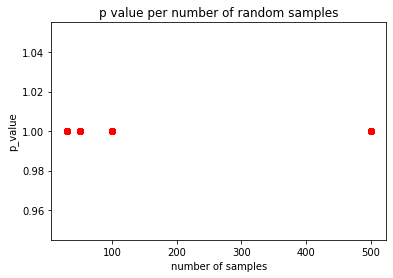

In [114]:
TenYearCHD_syBP = df[["sysBP", "TenYearCHD"]]
smaple_lengths = [30, 50, 100, 500]
for i in range(100):
  p_value = []
  for length in smaple_lengths:
    sample = TenYearCHD_syBP.sample(n=length)
    
    sample_TenYearCHD_0 = sample.loc[df["TenYearCHD"]==0]["sysBP"]
    sample_TenYearCHD_0_mean = sample_TenYearCHD_0.mean()

    sample_TenYearCHD_1 = sample.loc[df["TenYearCHD"]==1]["sysBP"]
    sample_TenYearCHD_1_mean = sample_TenYearCHD_1.mean()

    sample_n_0 = len(sample_TenYearCHD_0)
    sample_n_1 = len(sample_TenYearCHD_1)

    while sample_n_0 == 0 or sample_n_1 == 0:
      sample = TenYearCHD_syBP.sample(n=length)
      sample_TenYearCHD_0 = sample.loc[df["TenYearCHD"]==0]["sysBP"]
      sample_TenYearCHD_0_mean = sample_TenYearCHD_0.mean()
      sample_TenYearCHD_1 = sample.loc[df["TenYearCHD"]==1]["sysBP"]
      sample_TenYearCHD_1_mean = sample_TenYearCHD_1.mean()
      sample_n_0 = len(sample_TenYearCHD_0)
      sample_n_1 = len(sample_TenYearCHD_1)

    sample_var_0 = sample_TenYearCHD_0.var()
    sample_var_1 = sample_TenYearCHD_1.var()
    sample_mean_se_0 = (sample_var_0/sample_n_0)**0.5
    sample_mean_se_1 = (sample_var_1/sample_n_1)**0.5

    val = (TenYearCHD_1_mean-TenYearCHD_0_mean)/((var_1/n_1)+(var_0/n_0))**0.5
    p_value_z = stats.norm.cdf(val)

    p_value.append(p_value_z)

  plt.scatter(smaple_lengths, p_value, color='r')
    
plt.xlabel("number of samples")
plt.ylabel("p_value")
plt.title("p value per number of random samples")
plt.show()




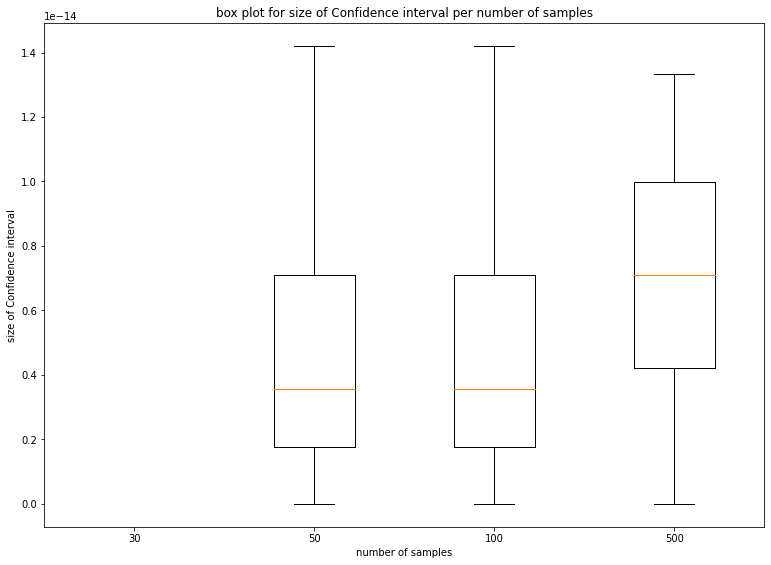

30 sample precentage mean in Confidence interval:  80 %
50 sample precentage mean in Confidence interval:  82 %
100 sample precentage mean in Confidence interval:  88 %
500 sample precentage mean in Confidence interval:  96 %


In [115]:
TenYearCHD_syBP = df[["sysBP", "TenYearCHD"]]
smaple_lengths = [30, 50, 100, 500]
precentage_dict_1={30:0,50:0,100:0,500:0}
box_plot_dict = {30:[],50:[],100:[],500:[]}
for i in range(100):
  sample_dict_1 = []
  for length in smaple_lengths:
    sample = TenYearCHD_syBP.sample(n=length)

    sample_TenYearCHD_1 = sample.loc[df["TenYearCHD"]==1]["sysBP"]
    sample_TenYearCHD_1_mean = sample_TenYearCHD_1.mean()

    sample_n_1 = len(sample_TenYearCHD_1)

    while sample_n_1 == 0 :
      sample = TenYearCHD_syBP.sample(n=length)
      sample_TenYearCHD_1 = sample.loc[df["TenYearCHD"]==1]["sysBP"]
      sample_TenYearCHD_1_mean = sample_TenYearCHD_1.mean()
      sample_n_1 = len(sample_TenYearCHD_1)

    sample_var_1 = sample_TenYearCHD_1.var()
    sample_mean_se_1 = (sample_var_1/sample_n_1)**0.5

    Confidence_interval_size_1 = abs(sample_TenYearCHD_1_mean - 1.96*sample_mean_se_1 - sample_TenYearCHD_1_mean + 1.96*sample_mean_se_1)
    
    box_plot_dict[length].append(Confidence_interval_size_1)

    if TenYearCHD_1_mean >= sample_TenYearCHD_1_mean - 1.96*sample_mean_se_1 and TenYearCHD_1_mean <= sample_TenYearCHD_1_mean + 1.96*sample_mean_se_1:
      precentage_dict_1[length] += 1

    sample_dict_1.append(Confidence_interval_size_1)

box_plot_array = [box_plot_dict[30],box_plot_dict[50],box_plot_dict[100],box_plot_dict[500]]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(box_plot_array)
plt.xlabel("number of samples")
plt.ylabel("size of Confidence interval")
plt.title("box plot for size of Confidence interval per number of samples")
ax.set_xticklabels(smaple_lengths)

plt.show()
plt.show()

print("30 sample precentage mean in Confidence interval: ",precentage_dict_1[30], "%")
print("50 sample precentage mean in Confidence interval: ",precentage_dict_1[50],"%")
print("100 sample precentage mean in Confidence interval: ",precentage_dict_1[100],"%")
print("500 sample precentage mean in Confidence interval: ",precentage_dict_1[500],"%")



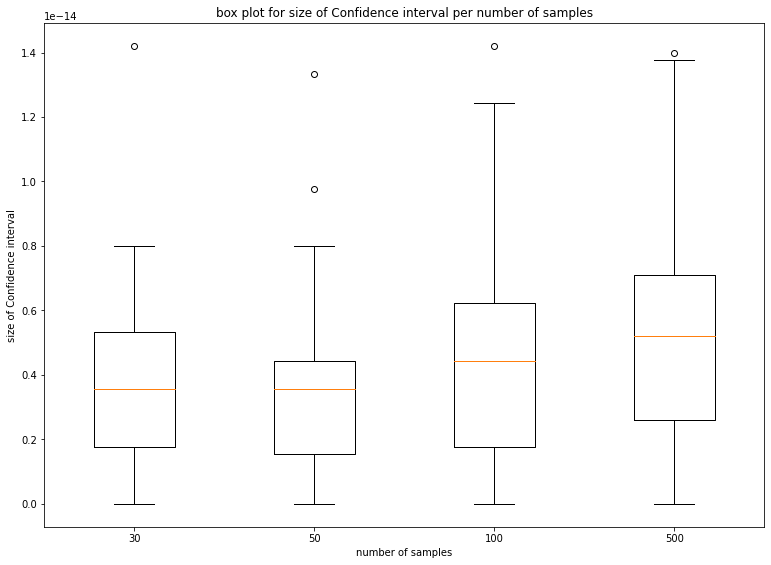

30 sample precentage mean in Confidence interval :  92 %
50 sample precentage mean in Confidence interval:  96 %
100 sample precentage mean in Confidence interval:  96 %
500 sample precentage mean in Confidence interval:  95 %


In [116]:
TenYearCHD_syBP = df[["sysBP", "TenYearCHD"]]
smaple_lengths = [30, 50, 100, 500]
precentage_dict_0={30:0,50:0,100:0,500:0}
box_plot_dict = {30:[],50:[],100:[],500:[]}
for i in range(100):
  sample_dict_0 = []
  for length in smaple_lengths:
    sample = TenYearCHD_syBP.sample(n=length)
    
    sample_TenYearCHD_0 = sample.loc[df["TenYearCHD"]==0]["sysBP"]
    sample_TenYearCHD_0_mean = sample_TenYearCHD_0.mean()

    sample_n_0 = len(sample_TenYearCHD_0)

    while sample_n_0 == 0:
      sample = TenYearCHD_syBP.sample(n=length)
      sample_TenYearCHD_0 = sample.loc[df["TenYearCHD"]==0]["sysBP"]
      sample_TenYearCHD_0_mean = sample_TenYearCHD_0.mean()
      sample_n_0 = len(sample_TenYearCHD_0)

    sample_var_0 = sample_TenYearCHD_0.var()
    sample_mean_se_0 = (sample_var_0/sample_n_0)**0.5

    Confidence_interval_size_0 = abs(sample_TenYearCHD_0_mean - 1.96*sample_mean_se_0 - sample_TenYearCHD_0_mean + 1.96*sample_mean_se_0)
    
    box_plot_dict[length].append(Confidence_interval_size_0)

    if TenYearCHD_0_mean >= (sample_TenYearCHD_0_mean - 1.96*sample_mean_se_0) and TenYearCHD_0_mean <= (sample_TenYearCHD_0_mean + 1.96*sample_mean_se_0):
      precentage_dict_0[length] += 1
    
    
    sample_dict_0.append(Confidence_interval_size_0)


box_plot_array = [box_plot_dict[30],box_plot_dict[50],box_plot_dict[100],box_plot_dict[500]]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(box_plot_array)
plt.xlabel("number of samples")
plt.ylabel("size of Confidence interval")
plt.title("box plot for size of Confidence interval per number of samples")
ax.set_xticklabels(smaple_lengths)

plt.show()

print("30 sample precentage mean in Confidence interval : ",precentage_dict_0[30],"%")
print("50 sample precentage mean in Confidence interval: ",precentage_dict_0[50],"%")
print("100 sample precentage mean in Confidence interval: ",precentage_dict_0[100],"%")
print("500 sample precentage mean in Confidence interval: ",precentage_dict_0[500],"%")



question 3, d:
we can see that the p value is 1.0 forevery batch of samples that we checked. we can unsder stand that ther is very good differnce in the blood pressure between people who are in danger for heart disease to the people who aren't in danger. 
furthermore, for the people who are in danger for heart disease, we can according to the boxplot that as we will increase the number of samples, the confidence interval will be bigger. 
for the people who aren't in danger for heart disease, we can see according to the box plot that the number of samples don't influence on the size of the confidence interval.
